In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

In [10]:
conn = sqlite3.connect('data/collection_addresses.db')
cur = conn.cursor()
cur.execute('SELECT name FROM sqlite_master WHERE type="table";')
cur.fetchall()

[('collection_addresses',)]

In [11]:
cur.execute('SELECT * FROM collection_addresses;')
coll_adds = cur.fetchall()

In [12]:
conn.close()

In [13]:
conn2 = sqlite3.connect('data/historical_price_data_sol.db')
cur2 = conn2.cursor()
cur2.execute('SELECT name FROM sqlite_master WHERE type = "table";')
cur2.fetchall()

[('pair_address_master',),
 ('6yY2PEU1bDN3PFDdsaiWoBYtw4phEkiScshVrxcMeQna',),
 ('5BnesJrWRGBEQUGiZGdyLJc2FvbmwxnZpp8GJawLyyFY',),
 ('DQ17ihSpj1qMvtJuPqrx5j46DFCVCBzoXoPU6eEtp2Ve',),
 ('HLBz4gFi8puCUEZTJ7rsfHUzqSq6tNg5DzuVpySzWdNF',)]

In [14]:
cur2.execute('SELECT name FROM sqlite_master WHERE type = "table";')
table_names = [row[0] for row in cur2.fetchall()[1:]]
print(table_names)
price_data = {
    db_table: pd.DataFrame(
        cur2.execute(
            f'SELECT * FROM "{db_table}";'
        ).fetchall(),
        columns = ['date', 'price_data']
    )
    for db_table in table_names
}

['6yY2PEU1bDN3PFDdsaiWoBYtw4phEkiScshVrxcMeQna', '5BnesJrWRGBEQUGiZGdyLJc2FvbmwxnZpp8GJawLyyFY', 'DQ17ihSpj1qMvtJuPqrx5j46DFCVCBzoXoPU6eEtp2Ve', 'HLBz4gFi8puCUEZTJ7rsfHUzqSq6tNg5DzuVpySzWdNF']


In [15]:
price_data

{'6yY2PEU1bDN3PFDdsaiWoBYtw4phEkiScshVrxcMeQna':                            date  price_data
 0    2024-05-09T15:34:39.076123    0.000011
 1    2024-05-09T15:34:38.572981    0.000011
 2    2024-05-09T15:34:43.410035    0.000011
 3    2024-05-09T15:34:42.309985    0.000011
 4    2024-05-09T15:34:45.616462    0.000011
 ..                          ...         ...
 256  2024-05-09T15:46:38.787274    0.000012
 257  2024-05-09T15:46:41.027065    0.000012
 258  2024-05-09T15:46:43.201754    0.000012
 259  2024-05-09T15:46:46.002357    0.000012
 260  2024-05-09T15:46:48.144390    0.000012
 
 [261 rows x 2 columns],
 '5BnesJrWRGBEQUGiZGdyLJc2FvbmwxnZpp8GJawLyyFY':                            date  price_data
 0    2024-05-09T15:34:39.076123    0.000096
 1    2024-05-09T15:34:38.572981    0.000096
 2    2024-05-09T15:34:43.410035    0.000096
 3    2024-05-09T15:34:42.309985    0.000096
 4    2024-05-09T15:34:45.616462    0.000096
 ..                          ...         ...
 256  2024-05-09T15:46

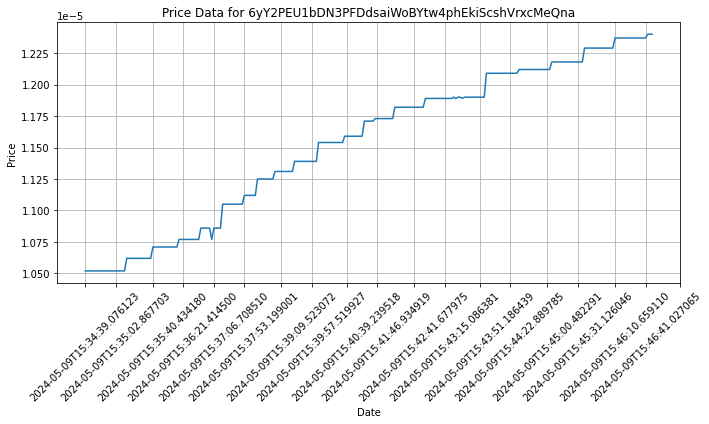

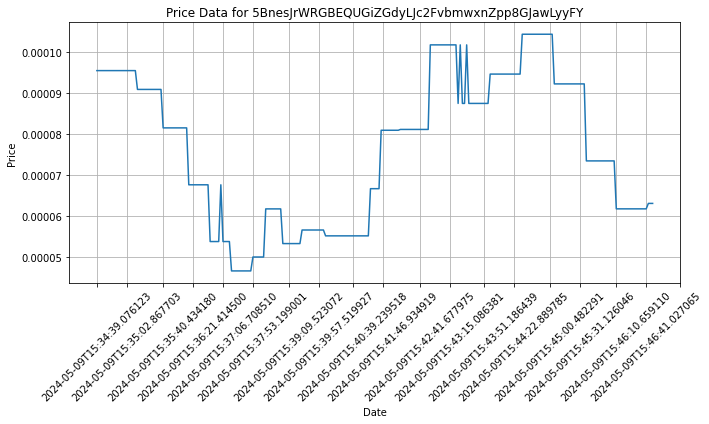

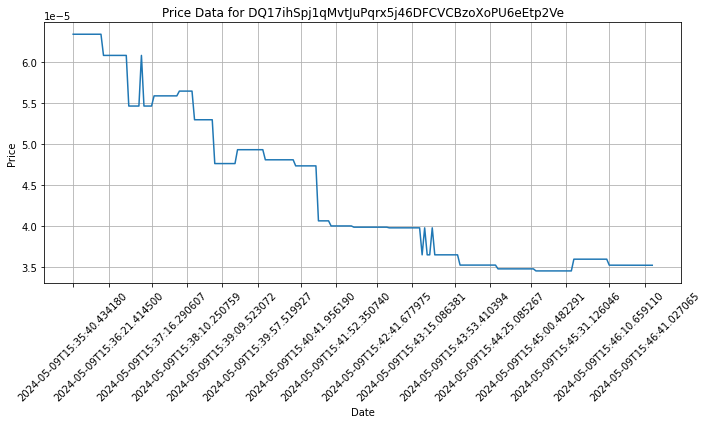

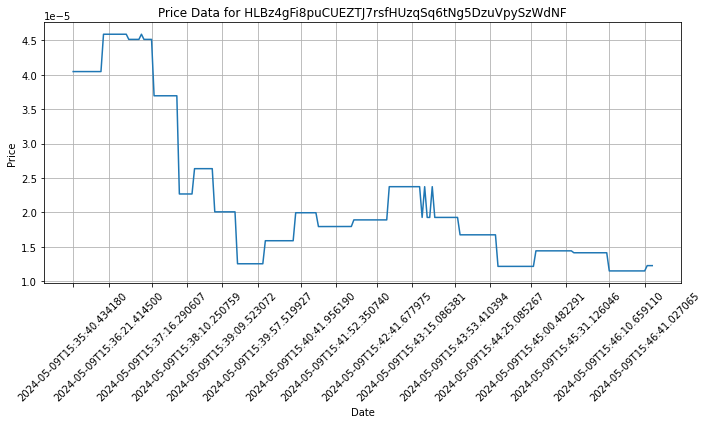

In [17]:
for key, df in price_data.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['price_data'])
    plt.title(f'Price Data for {key}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    locator = mdates.AutoDateLocator(minticks=15)
    #formatter = mdates.ConciseDateFormatter(locator)
    plt.gca().xaxis.set_major_locator(locator)
    #plt.gca().xaxis.set_major_formatter(formatter)
    plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.sort_values(by = 'date'))

                           date     price
0    2024-05-01T19:54:27.382377  0.000008
1    2024-05-01T20:04:06.985620  0.000002
2    2024-05-01T20:04:07.611225  0.000002
4    2024-05-01T20:04:12.391319  0.000002
3    2024-05-01T20:04:12.408774  0.000002
5    2024-05-01T20:04:16.413305  0.000002
6    2024-05-01T20:04:16.430941  0.000002
8    2024-05-01T20:04:19.433901  0.000002
7    2024-05-01T20:04:19.461686  0.000002
10   2024-05-01T20:04:24.390368  0.000002
9    2024-05-01T20:04:24.408784  0.000002
11   2024-05-01T20:04:29.378060  0.000002
12   2024-05-01T20:04:29.392227  0.000002
13   2024-05-01T20:04:34.415483  0.000002
14   2024-05-01T20:04:34.432626  0.000002
15   2024-05-01T20:04:39.411706  0.000002
16   2024-05-01T20:04:39.433183  0.000002
18   2024-05-01T20:04:44.448455  0.000002
17   2024-05-01T20:04:44.466868  0.000002
20   2024-05-01T20:04:48.939962  0.000003
19   2024-05-01T20:04:48.956871  0.000003
22   2024-05-01T20:04:52.391278  0.000003
21   2024-05-01T20:04:52.407723  0